# Performance Evaluation

In [394]:
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (15, 10)
#matplotlib.rcParams["figure.autolayout"] = True

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import timedelta
from typing import Optional

with pd.HDFStore('../ListInstancesStore.h5') as store:
    instancesStore = store['results']
    
with pd.HDFStore('../ListClassesStore.h5') as store:
    classesStore = store['results']
    
with pd.HDFStore('../ListInstancesAndClassesStore.h5') as store:
    instancesAndClassesStore = store['results']
    
with pd.HDFStore('../ListInstancesAndClassesEqualizedInstanceCountsStore.h5') as store:
    instancesAndClassesEqualizedInstanceCountsStore = store['results']

with pd.HDFStore('../threedStore.h5') as store:
    threedStore = store['results']
    
humanTaskNames = {
    "instancesInf": "#instances by HermiT (OWL inference task)",
    "instancesSparql": "#instances by Jena ARQ (SPARQL)",
    "buildkb": "KB mapping"

}

taskColors = {
    "instancesInf": "#0083CC",
    "instancesSparql": "#F5A300",
    "buildkb": "#009D81"
}
    
def plotTime(store, task):
    frame = store['times'].transform(lambda x: x[task])
    fig = frame.astype('timedelta64[s]').plot.bar()
    #fig.set_yscale('symlog')
    plt.show()
    display(frame)
    
def plotTime3D(task):
    frame = threedStore['times'].transform(lambda x: x[task])
    
    # setup the figure and axes
    fig = plt.figure()
    ax1 = fig.add_subplot(121, projection='3d')


    ax1.bar3d(frame)
    plt.show()

def plotTaskTimeComparison(store, ymax: Optional[float]):
    tasks = store['times'].iloc[0].keys()
    tasks = [task for task in tasks if task in humanTaskNames]
    labels = store.index
    
    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars
    
    fig, ax = plt.subplots()
    
    idx = 0
    for task in tasks:
      frame = store['times'].transform(lambda x: x[task]).astype('timedelta64[ns]').transform(lambda x: x / timedelta(seconds=1))
      subfig = ax.bar((x + (idx * width/len(tasks))) - width/len(tasks)/2, frame, width=width/len(tasks), label=task)
      ax.bar_label(subfig, labels=["{:.2f}s".format(f) for f in frame], padding=3)
      #fig.set_yscale('symlog')
      idx = idx + 1
    
      display(frame)
    
    plt.legend([humanTaskNames[task] for task in tasks])
    ax.set_xticks(x, labels)
    if ymax:
      ax.set_ylim([0, ymax])
    
    fig.tight_layout()
    plt.show()
    return fig
    
    
def plotAllStats(store):
    labels = store.index[0:2]

    x = np.arange(len(labels))  # the label locations
    width = 0.2  # the width of the bars

    fig, ax = plt.subplots()
    for idx in labels:
        stats = store.loc[idx]['stats']
        idx = 0
        for key in stats:
            rects = ax.bar((x + (idx * width/len(stats))) - width/2, stats[key], width, label=key)
            ax.bar_label(rects, padding=10)
            idx = idx + 1

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Scores')
    ax.set_title('Scores by group and gender')
    ax.set_xticks(x, labels)
    # ax.legend()

    fig.tight_layout()

    plt.show()
    
def plotStats(store, idx):
    statsDict = store.loc[idx]['stats']
    plt.bar(*zip(*statsDict.items()))
    
    all_axes = plt.gcf().get_axes()
    ax = all_axes[0]
    ax.set_yscale('symlog')
    
    plt.show()

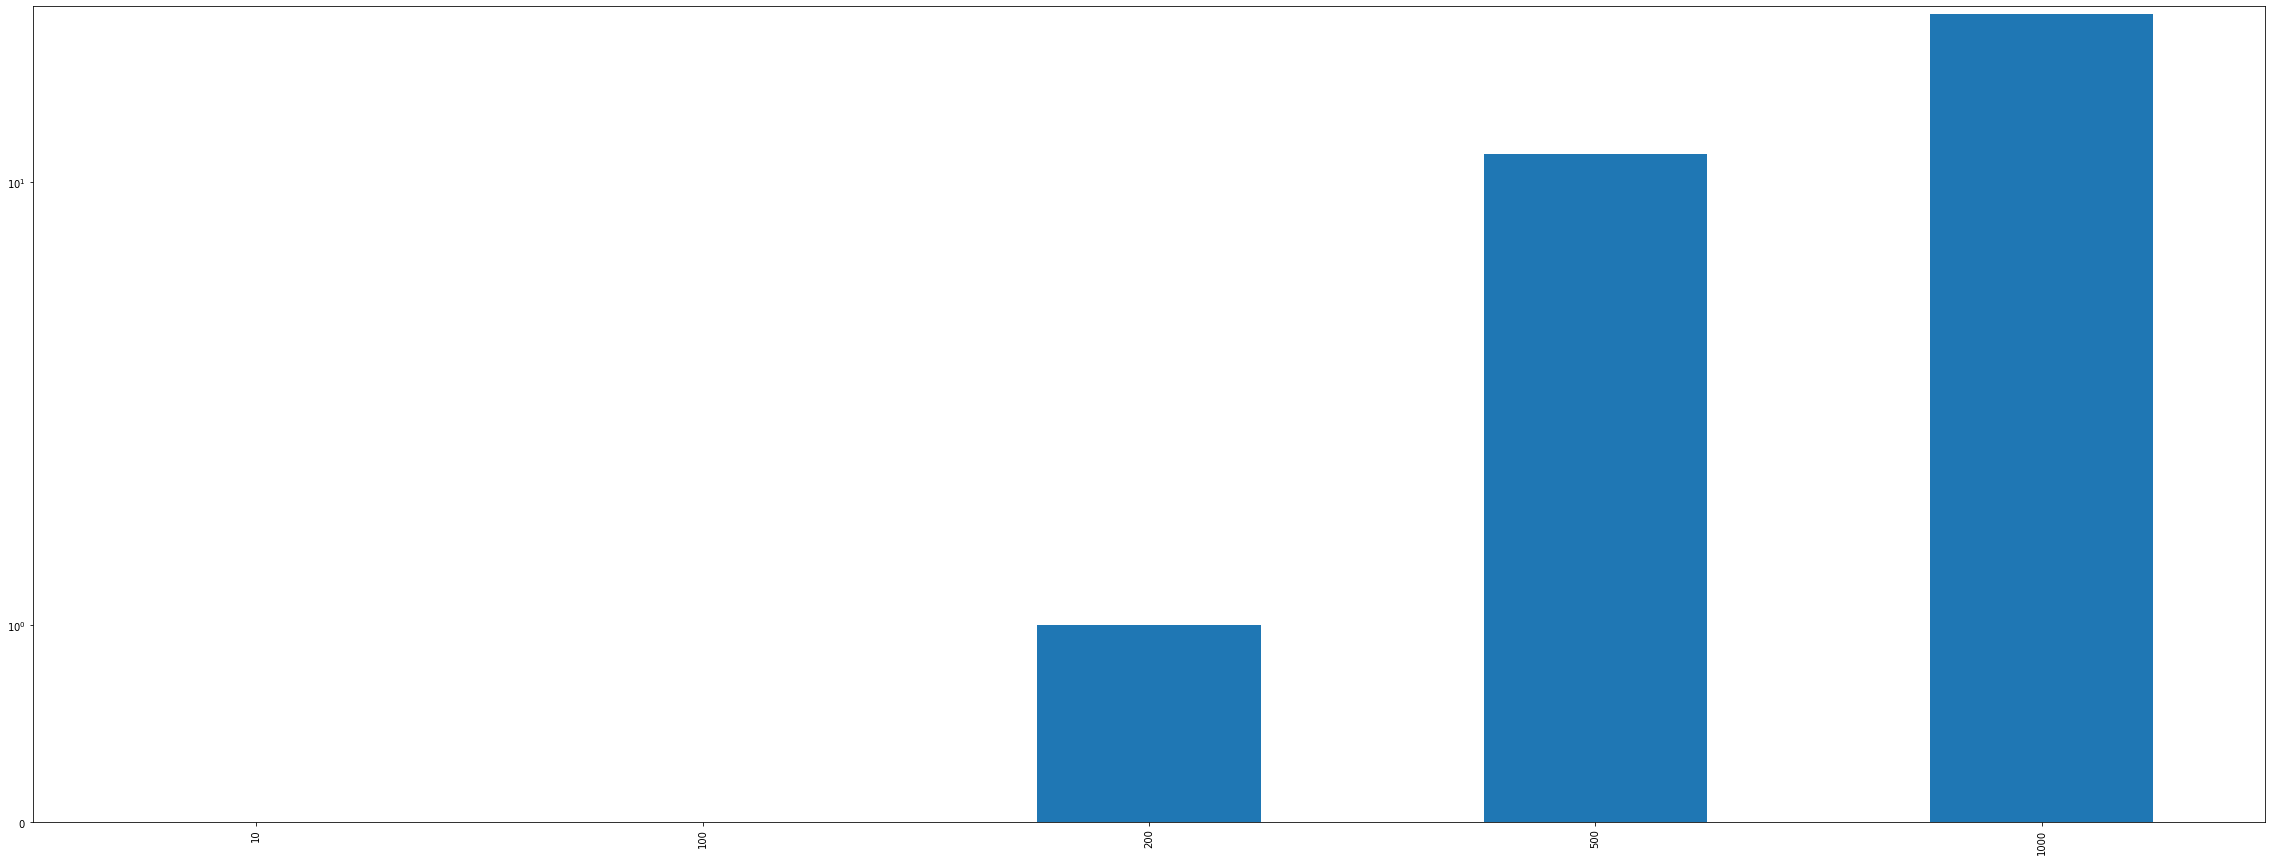

10     0 days 00:00:00.298505
100    0 days 00:00:00.526000
200    0 days 00:00:01.288756
500    0 days 00:00:12.481838
1000          0 days 00:00:30
Name: time, dtype: timedelta64[ns]

In [101]:
plotTime(instancesStore)

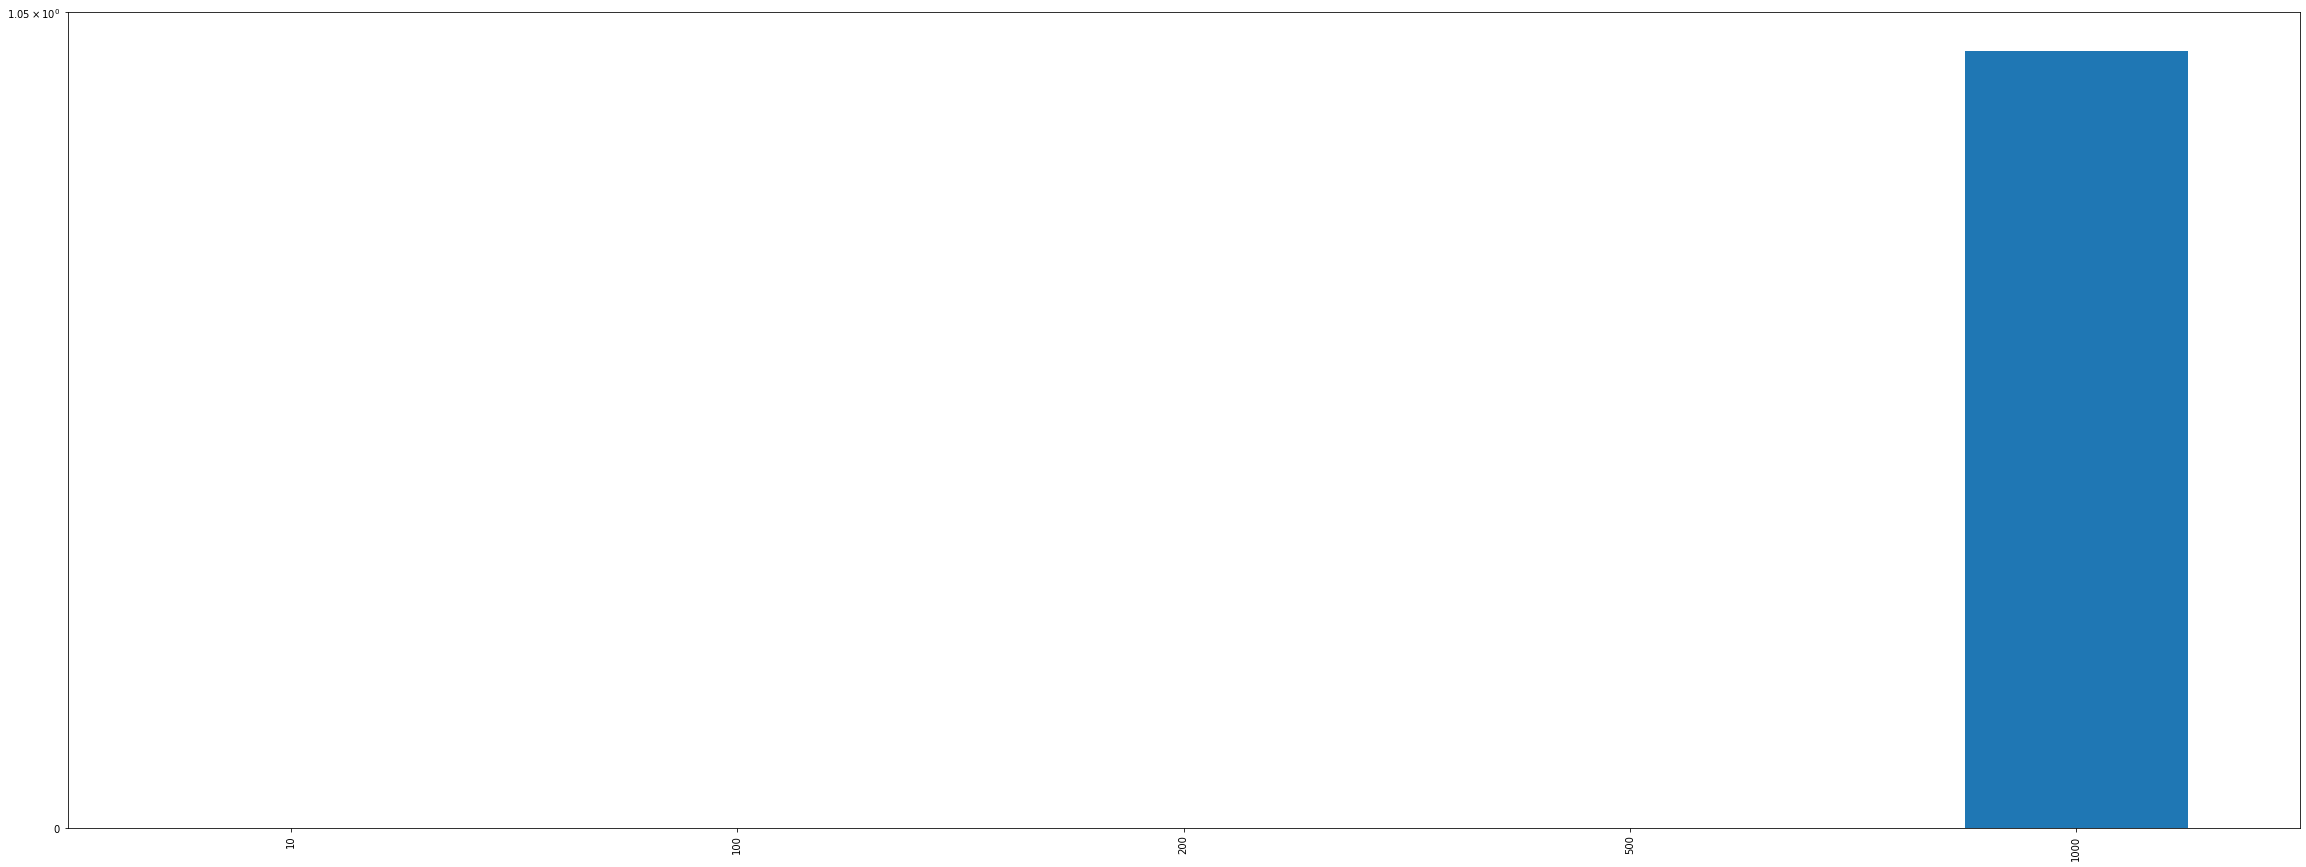

10     0 days 00:00:00.812281
100    0 days 00:00:00.842802
200    0 days 00:00:00.819462
500    0 days 00:00:00.824602
1000   0 days 00:00:01.004930
Name: time, dtype: timedelta64[ns]

In [105]:
plotTime(classesStore)

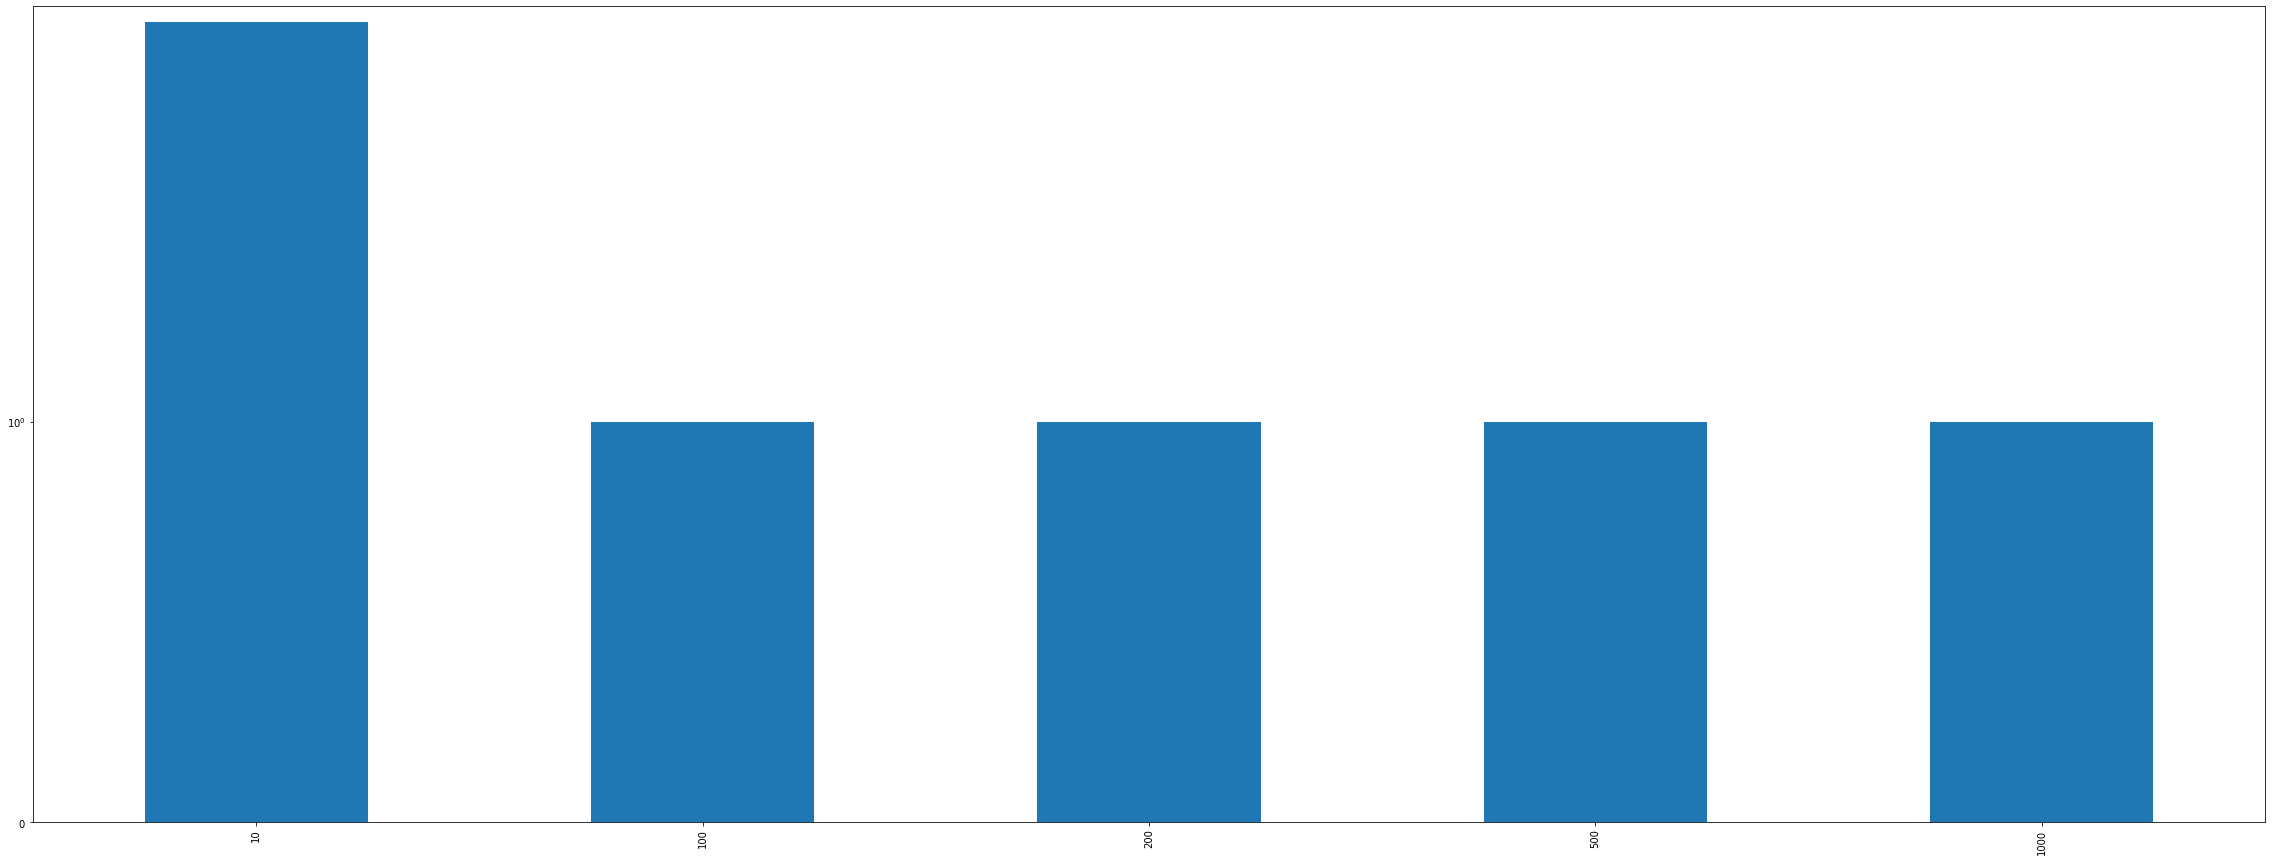

10     0 days 00:00:02.057648
100    0 days 00:00:01.516574
200    0 days 00:00:01.327436
500    0 days 00:00:01.357942
1000   0 days 00:00:01.384977
Name: time, dtype: timedelta64[ns]

In [109]:
plotTime(instancesAndClassesStore)

# Instances Task

* the number of classes does not seem to affect reasoning time much at all
* not that surprising, since the number of instances being queried was low (1)

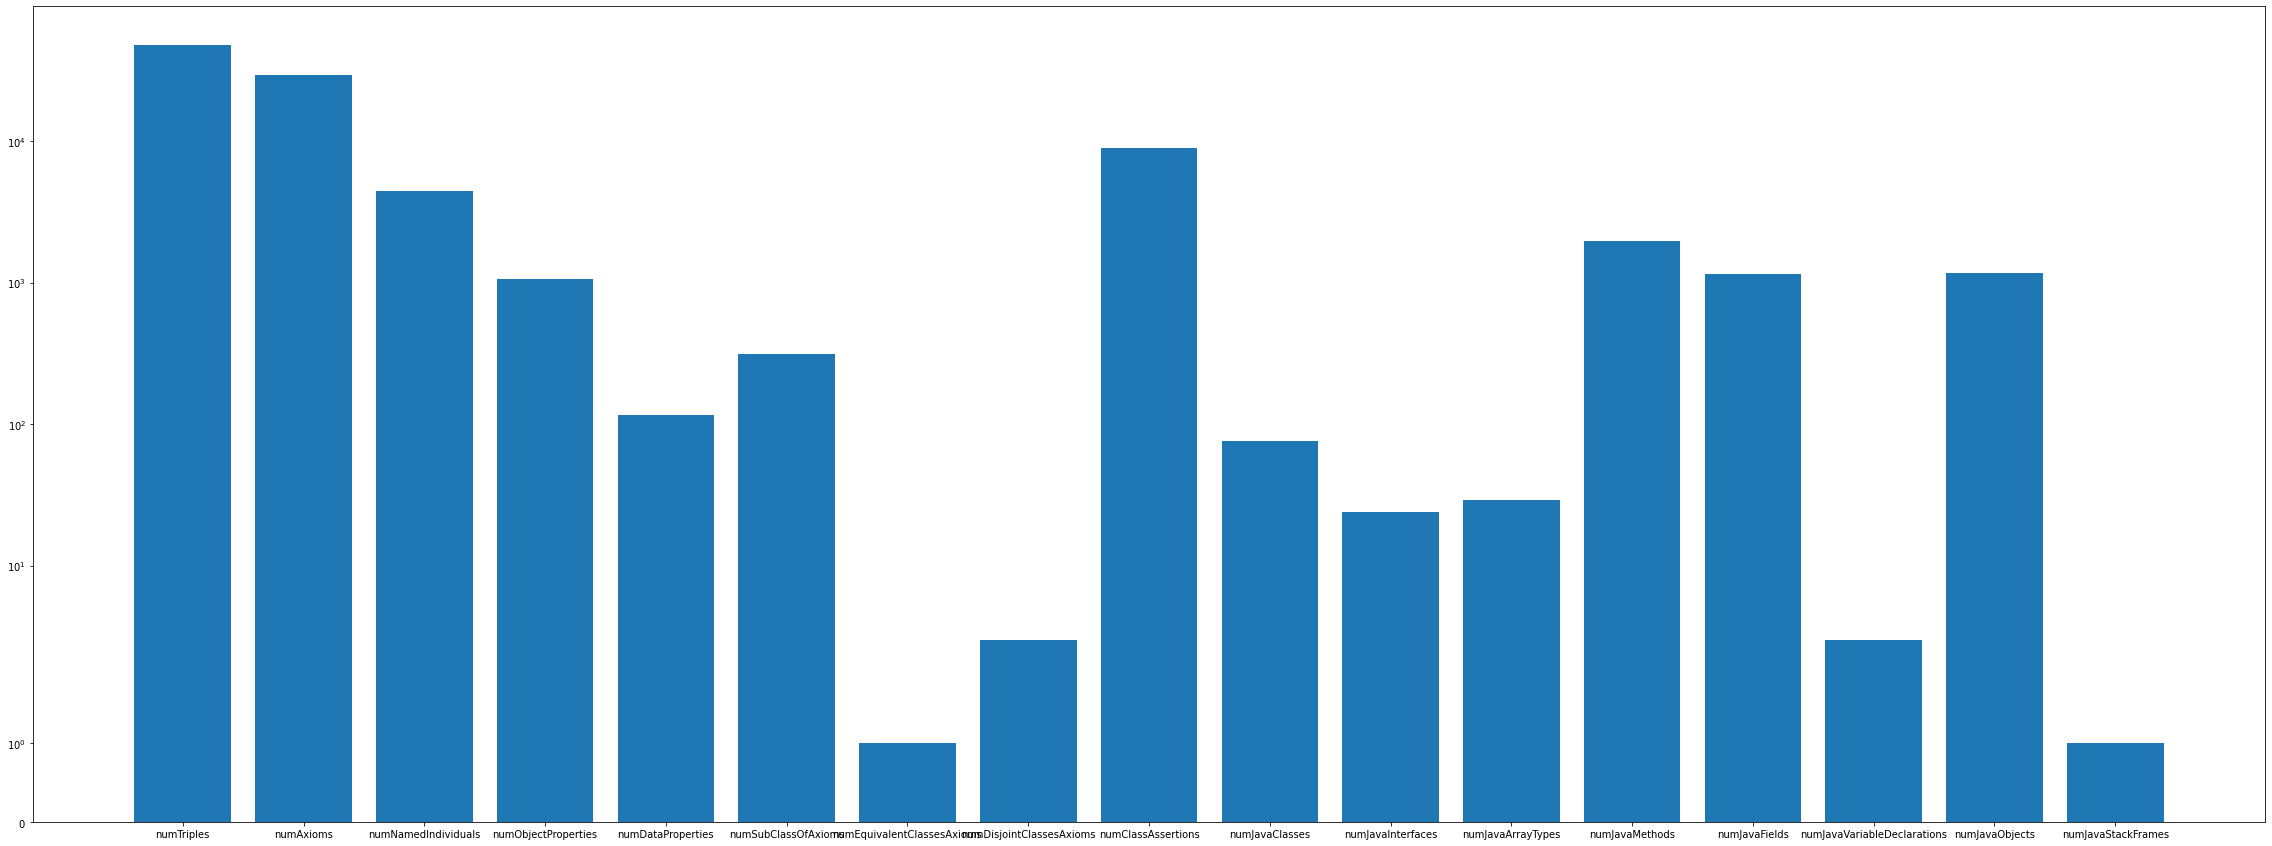

In [102]:
plotStats(instancesStore, 1000)

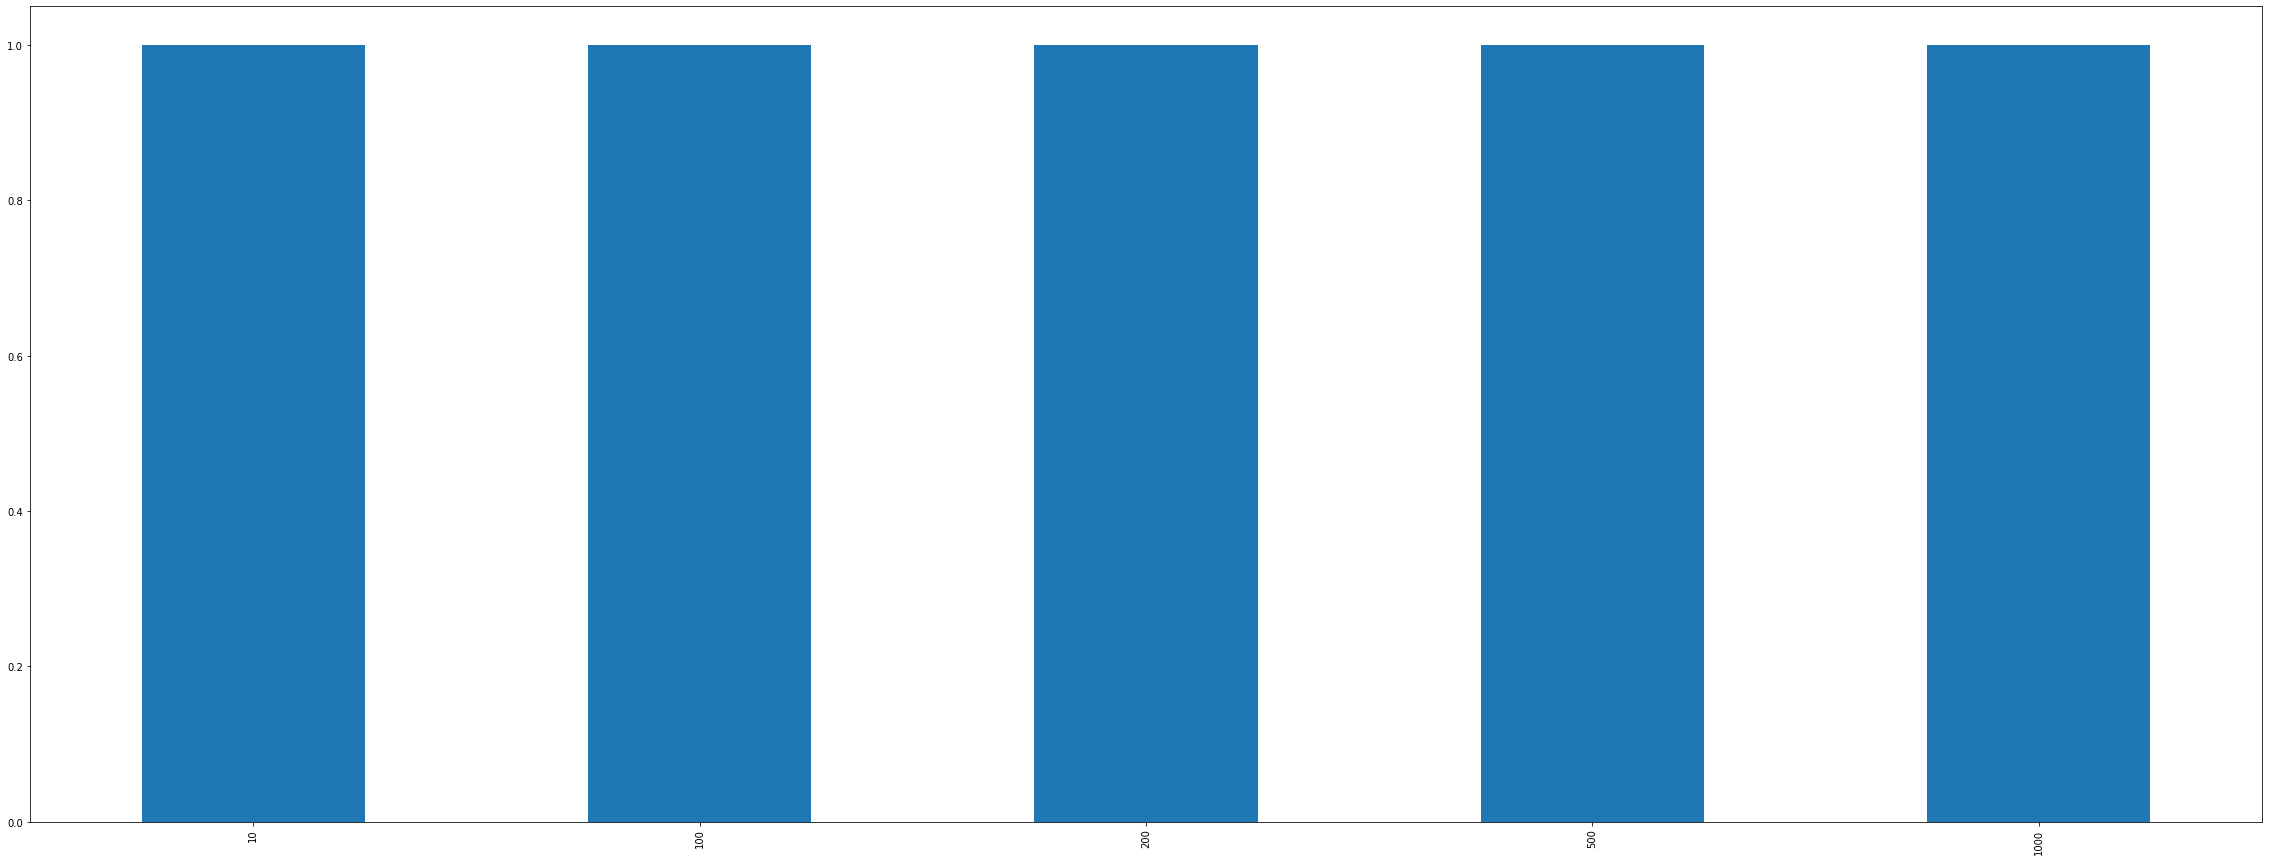

10     0 days 00:00:01.341753
100    0 days 00:00:01.415950
200    0 days 00:00:01.245653
500    0 days 00:00:01.666645
1000   0 days 00:00:01.933969
Name: times, dtype: timedelta64[ns]

In [127]:
plotTime(instancesStore, 'instancesInf')

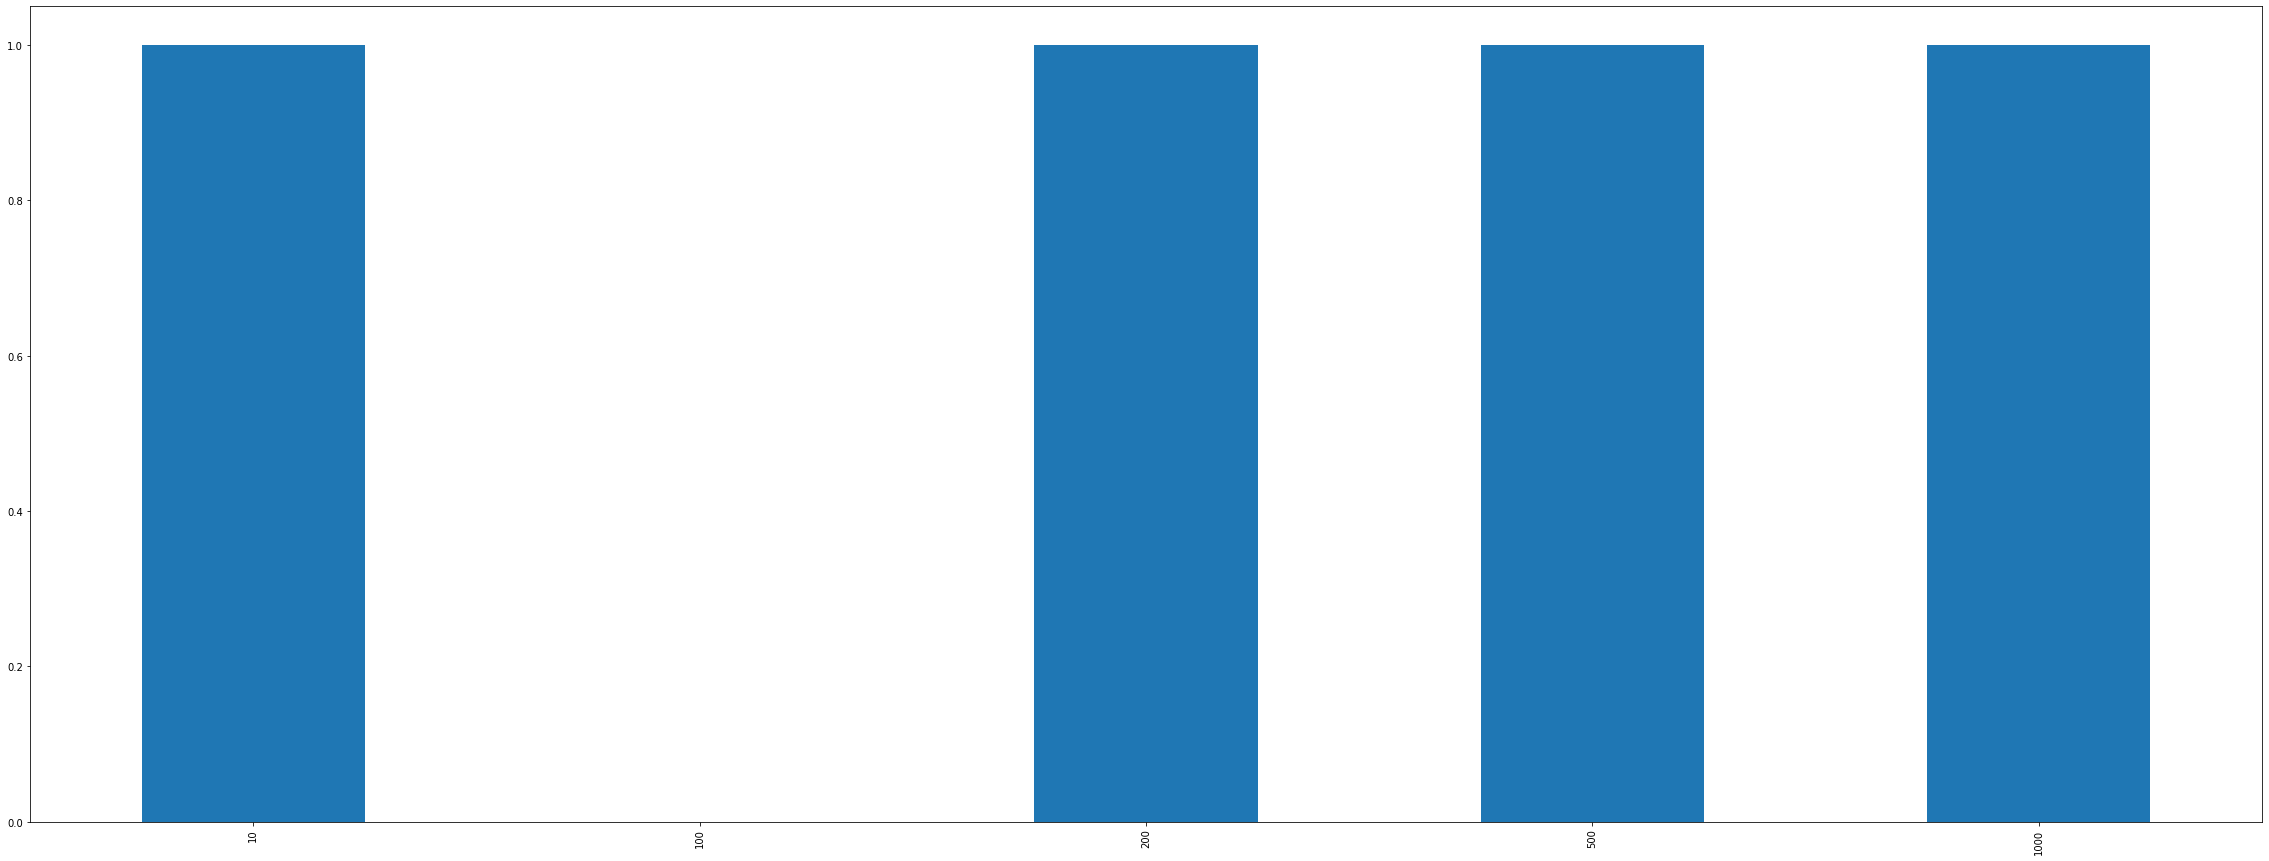

10     0 days 00:00:01.064348
100    0 days 00:00:00.984741
200    0 days 00:00:01.162026
500    0 days 00:00:01.177927
1000   0 days 00:00:01.068332
Name: times, dtype: timedelta64[ns]

In [128]:
plotTime(classesStore, 'instancesInf')

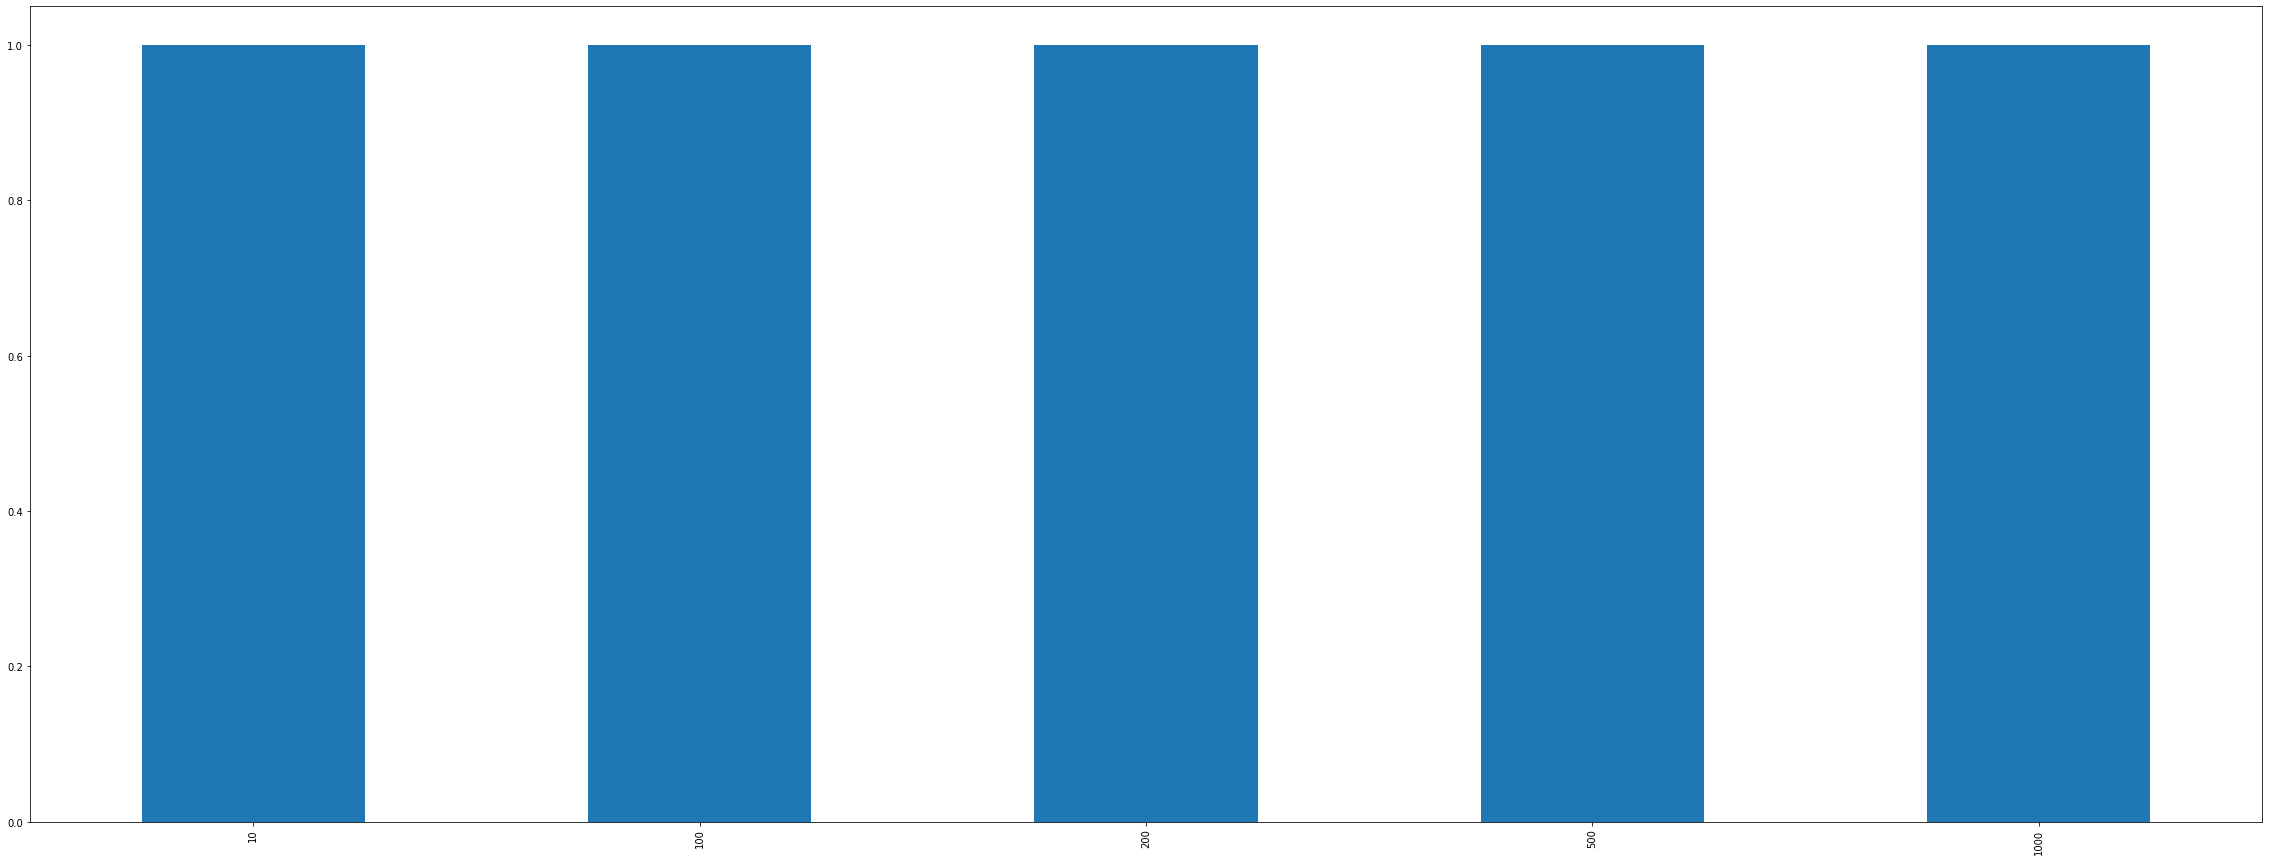

10     0 days 00:00:01.350837
100    0 days 00:00:01.270844
200    0 days 00:00:01.381213
500    0 days 00:00:01.447171
1000   0 days 00:00:01.578023
Name: times, dtype: timedelta64[ns]

In [129]:
plotTime(instancesAndClassesStore, 'instancesInf')

In [134]:
plotTime(instancesAndClassesEqualizedInstanceCountsStore, 'instancesInf')

ValueError: Transform function failed

10      1.341753
100     1.415950
200     1.245653
500     1.666645
1000    1.933969
Name: times, dtype: float64

10      0.259483
100     0.262176
200     0.267139
500     0.241796
1000    0.284551
Name: times, dtype: float64

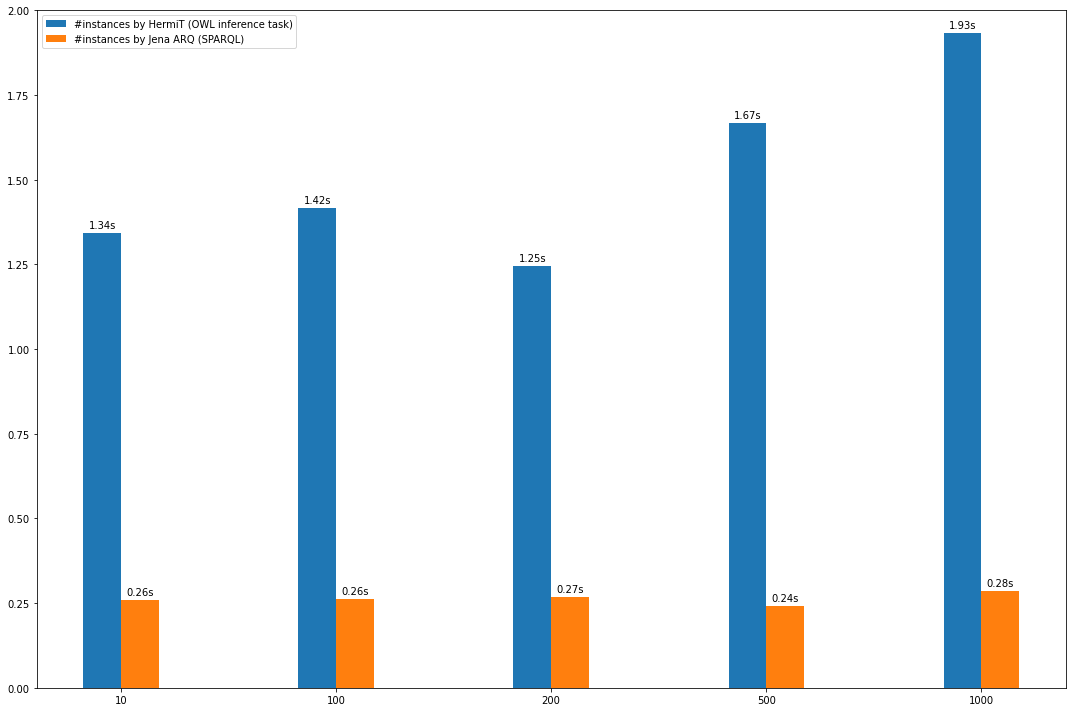

In [285]:
plotTaskTimeComparison(instancesStore, ymax=2).savefig("instances.jpg")

10      1.064348
100     0.984741
200     1.162026
500     1.177927
1000    1.068332
Name: times, dtype: float64

10      0.213847
100     0.187679
200     0.146644
500     0.141196
1000    0.157120
Name: times, dtype: float64

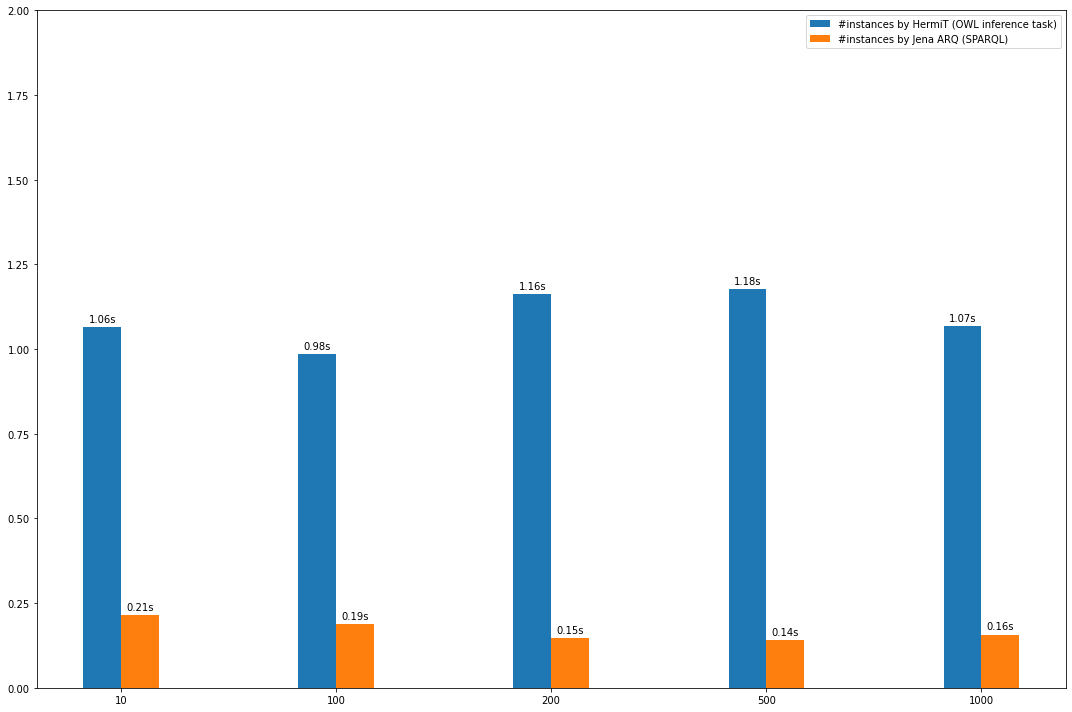

In [286]:
plotTaskTimeComparison(classesStore, ymax=2).savefig('classes.jpg')

10      1.350837
100     1.270844
200     1.381213
500     1.447171
1000    1.578023
Name: times, dtype: float64

10      0.201155
100     0.184803
200     0.150936
500     0.179436
1000    0.179760
Name: times, dtype: float64

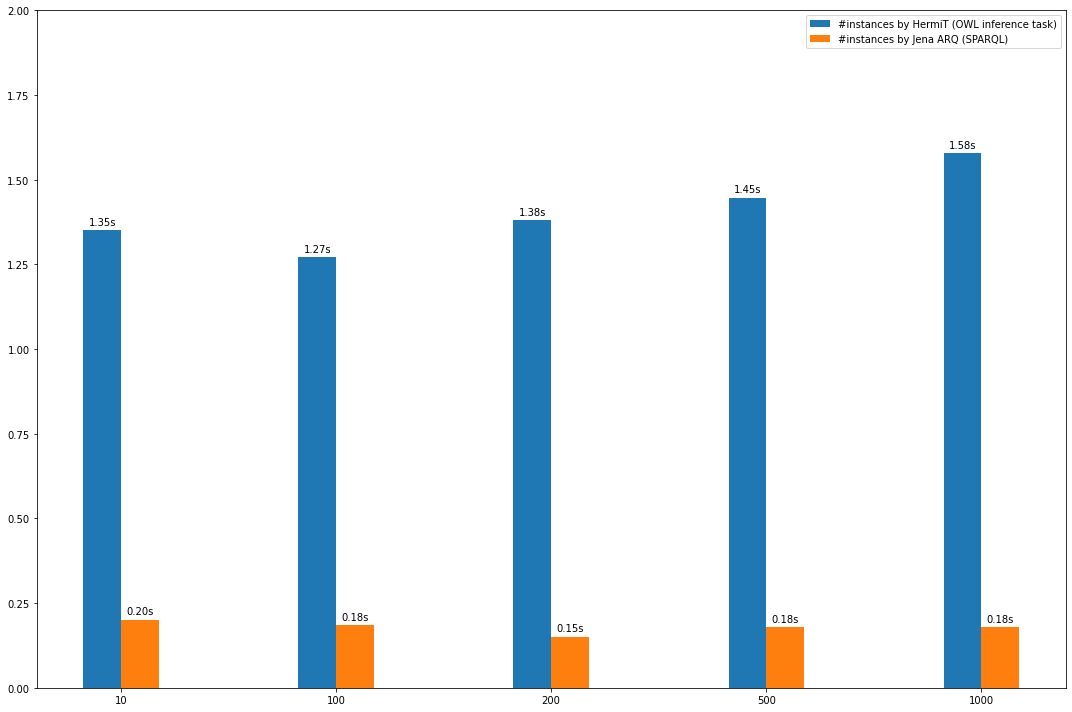

In [287]:
plotTaskTimeComparison(instancesAndClassesStore, ymax=2).savefig('instancesAndClasses.jpg')

<img src=instances.jpg width=600 /> <img src="classes.jpg" width=600/> 
<img src="instancesAndClasses.jpg" width=600/> 

10      1.004985
100     1.924329
200     3.192536
500     8.382650
1000    8.284960
Name: times, dtype: float64

10      0.148689
100     0.134031
200     0.107844
500     0.104279
1000    0.103185
Name: times, dtype: float64

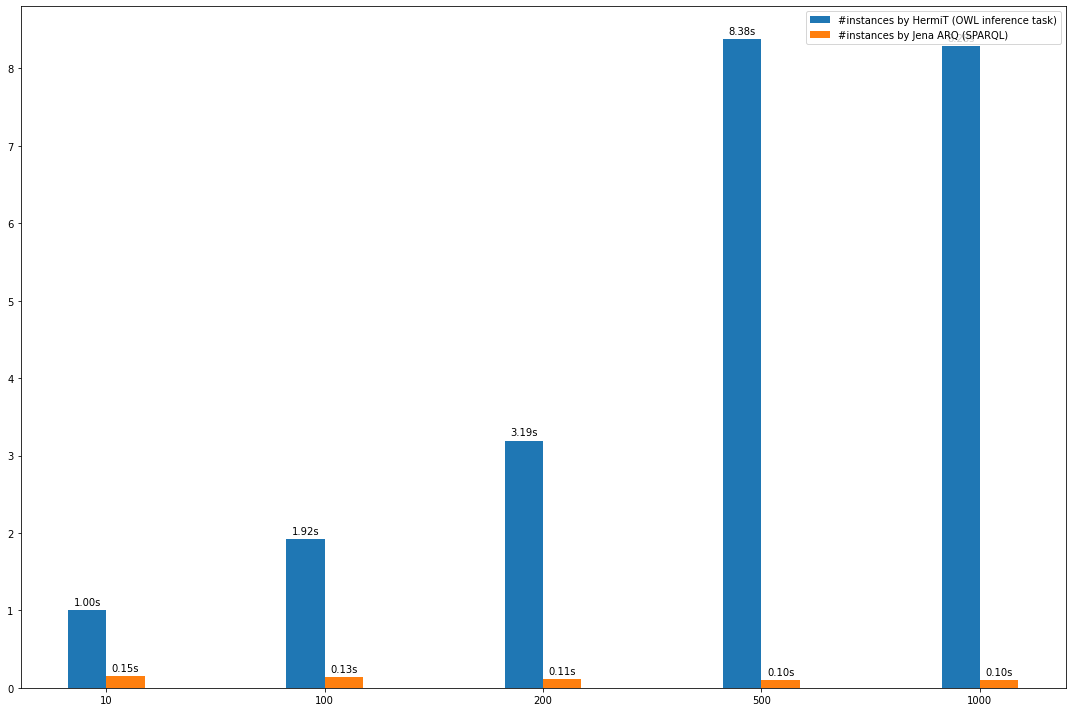

In [310]:
plotTaskTimeComparison(instancesAndClassesEqualizedInstanceCountsStore, ymax=None).savefig('instancesAndClassesEqualizedInstanceCounts.jpg')

In [326]:
#plotTime3D('instancesInf')

times
100  100  0 days 00:00:03.158049
     200  0 days 00:00:02.644085
     300  0 days 00:00:02.516693
     400  0 days 00:00:02.531946
     500  0 days 00:00:03.837904
...                          ...
1000 600  0 days 00:00:16.824974
     700  0 days 00:00:22.427706
     800  0 days 00:00:32.343030
     900  0 days 00:00:48.056326
     1000 0 days 00:00:52.446649

[100 rows x 1 columns]

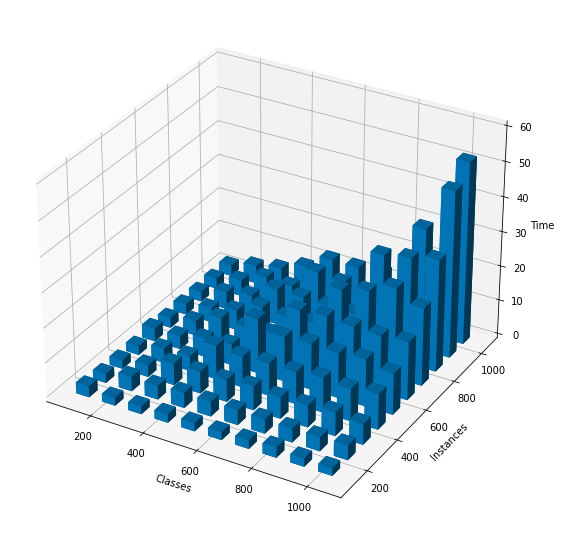

In [397]:
def time3D(task, zmax: Optional[float]=None):
  frame = pd.DataFrame(threedStore['times'].transform(lambda x: x[task]))
  display(frame)

  # setup the figure and axes
  fig = plt.figure()
  ax = fig.add_subplot(121, projection='3d')

  x = frame.index.get_level_values(0)
  y = frame.index.get_level_values(1)
  z = np.zeros_like(x)

  dx = dy = 50
  dz = np.array(frame.iloc[:,0].transform(lambda x: x.total_seconds()))

  ax.set_xlabel('Classes')
  ax.set_ylabel('Instances')
  ax.set_zlabel('Time')

  if zmax:
    ax.set_zlim([0, zmax])

  ax.bar3d(x, y, z, dx, dy, dz, color=taskColors[task])
  plt.show()

time3D('instancesInf', zmax=60)

times
100  100  0 days 00:00:00.204955
     200  0 days 00:00:00.167803
     300  0 days 00:00:00.155735
     400  0 days 00:00:00.157916
     500  0 days 00:00:00.233195
...                          ...
1000 600  0 days 00:00:00.149386
     700  0 days 00:00:00.151618
     800  0 days 00:00:00.150045
     900  0 days 00:00:00.172715
     1000 0 days 00:00:00.204742

[100 rows x 1 columns]

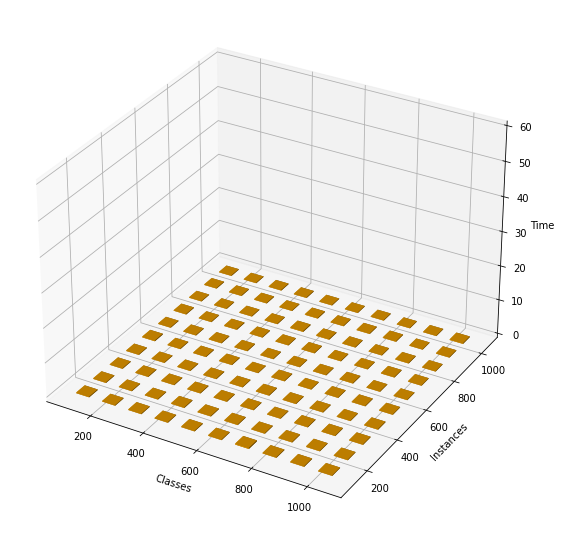

In [396]:
time3D('instancesSparql', zmax=60)

times
100  100  0 days 00:00:05.297562
     200  0 days 00:00:06.227938
     300  0 days 00:00:05.714390
     400  0 days 00:00:05.877687
     500  0 days 00:00:06.765099
...                          ...
1000 600  0 days 00:00:15.489749
     700  0 days 00:00:20.406993
     800  0 days 00:00:21.618407
     900  0 days 00:00:27.032216
     1000 0 days 00:00:31.222250

[100 rows x 1 columns]

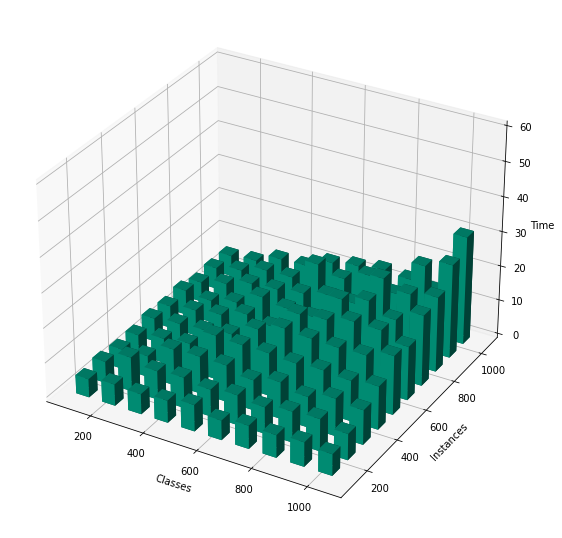

In [395]:
time3D('buildkb', zmax=60)